# Error performance surface and convergence path

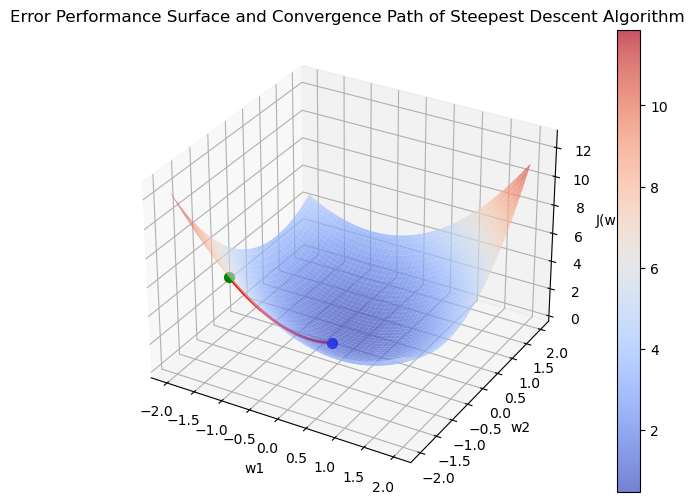

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the autocorrelation matrix R
R = np.array([[1, 0.4045], [0.4045, 1]])

# Define the cross-correlation vector p
p = np.array([0, 0.2939])

# Define the variance of the desired signal
sigma_d2 = 0.5

# Define the step size parameter
mu = 0.01

# Define the range of filter coefficient values
w1_values = np.linspace(-2, 2, 100)
w2_values = np.linspace(-2, 2, 100)

# Compute the error performance surface
J_values = np.zeros((len(w1_values), len(w2_values)))

for i, w1 in enumerate(w1_values):
    for j, w2 in enumerate(w2_values):
        w = np.array([w1, w2])
        J_values[i, j] = sigma_d2 - np.dot(p, w) + np.dot(np.dot(w, R), w)

# Perform steepest descent algorithm
w = np.array([-1, -2])
w_list = [w]
J_list = [sigma_d2 - np.dot(p, w) + np.dot(np.dot(w, R), w)]

for i in range(100):
    w = w - mu * (np.dot(R, w) - p)
    w_list.append(w)
    J_list.append(sigma_d2 - np.dot(p, w) + np.dot(np.dot(w, R), w))

# Plot the error performance surface and convergence path
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
W1, W2 = np.meshgrid(w1_values, w2_values)
surf = ax.plot_surface(W1, W2, J_values.T, cmap='coolwarm', alpha=0.7)
w1_list, w2_list = zip(*w_list)
J_convergence = np.array(J_list)

ax.plot(w1_list, w2_list, J_convergence, color='red', linewidth=2)
ax.scatter(w1_list[0], w2_list[0], J_convergence[0], color='green', s=50)
ax.scatter(w1_list[-1], w2_list[-1], J_convergence[-1], color='blue', s=50)

ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('J(w)')
ax.set_title('Error Performance Surface and Convergence Path of Steepest Descent Algorithm')

fig.colorbar(surf)
plt.show()


# Contour Plot

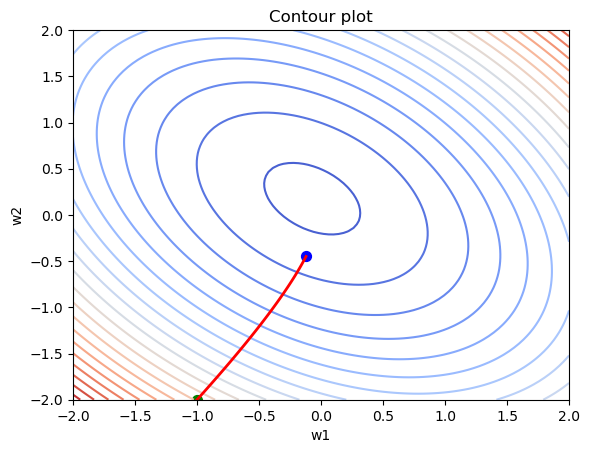

In [2]:
# Plot the error performance surface and convergence path
fig, ax = plt.subplots()
ax.contour(w1_values, w2_values, J_values.T, levels=20, cmap='coolwarm')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_title('Contour plot')
# Plot the convergence path
ax.plot(w1_list, w2_list, color='red', linewidth=2)
ax.scatter(w1_list[0], w2_list[0], color='green', s=50)
ax.scatter(w1_list[-1], w2_list[-1], color='blue', s=50)
plt.show()